# LAB: Random Projections : SOLUTIONS


#### Authors: R. M. Gower

## Aim

The aim of this material is to
- to show that in practice dimension reduction can be used with no loss of accuracy on some problem
- code efficient sparse random projections
- apply sparse random projections together with knearestneighbors


## VERY IMPORTANT

- This work **must be done by pairs of students**.
- Each paris of students must send their jupyter notebook **before the 24th of November at 21:59** to **gowerrobert@gmail.com**
- The **name of the file must be** constructed as in the next cell

# Gentle reminder: no evaluation if you don't respect this EXACTLY

### How to construct the name of your file

In [1]:
# Change here using YOUR first and last names
fn1 = "ndjekoua sandjo"
ln1 = "jean thibaut"
fn2 = "philipp"
ln2 = "schlieker"

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["lab1", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

lab1_jean thibaut_ndjekoua sandjo_and_schlieker_philipp.ipynb


In [0]:
#Throughout the notebook you will find commented boxes like this one

### TODO ###   
# please implement blabla
#############

These boxes need to be replaced by code as explained in the boxes.
Solutions will online tomorrow. Good luck!

In [0]:
%matplotlib inline

In [0]:
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier 

def get_data(dataname):
    data = load_svmlight_file(dataname)
    return data[0], data[1]


# Supress warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## EXERCISE 1: 

Use LogisticRegression classifier of Scikit-learn to experimentally confirm the following corollary proven in class and test random sparse projections

### Corollary of Range Space Preserving Theorem  

Let 
$$ X^\top = [x_1, \ldots, x_n]\in \mathbb{R}^{n\times d},$$
be our data matrix and let
$$  X X^\top= [\hat{x}_1, \ldots, \hat{x}_n]^\top \in \mathbb{R}^{d\times d}. $$
We can find a solution to the following training problem
$$ w^* \in \min_{w \in \mathbb{R}^d}  \frac{1}{n}\sum_{i=1}^n \ell_i(\langle x_i,w \rangle) \hspace{3cm} (I)$$
by instead solving 
$$ \hat{w}^* \in \min_{w \in \mathbb{R}^n}  \frac{1}{n}\sum_{i=1}^n \ell_i(\langle \hat{x}_i,w \rangle) \hspace{3cm} (II)$$
and  $ X ^\top \hat{w}^*$ is a solution to $(I)$

**NOTE:** The matrix $X$ is transposed with respect to the data matrix defined in class and in the lectures ! Be careful with dimnensions!
### End Corollary

1) [2pts] Show that by setting the regularization parameter close to zero (C = 10^9) in LogisticRegression, the score obtained by training using $X$ and $XX^\top$ is the same
  
2) [2pts] Compute a solution $w^*_1$  by directly solving (I).  Compare this $w^*_1$ to the recovered solution $X \hat{w}^*$. Are they the same? Justify based on Corollary.

3) [6pts] Using a random generated gaussian matrix $W \in\mathbb{R}^{d\times r}$ , project the data matrix $X \rightarrow XW$. Test for different values of r and
apply logistic regression to the resulting projected matrix. Can you explain what you observe? 

In [6]:
# download the colon-cancer data set from 
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/colon-cancer.bz2
# Unpack and place in the same folder as this python notebook
dataname = "colon-cancer"  
X, y = get_data(dataname)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
print('{n} data points and {d} features'.format(n = n,d =d))

41 data points and 2000 features


In [7]:
C0 = 10**9 # almost no regularization, since this is the inverse of the regularization parameter, i.e, C = 1/lambda
log_reg = LogisticRegression(C = C0) # , multi_class = "multinomial"
log_reg.fit(X_train, y_train)
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.619


In [8]:
### TODO ###   
# 2)  Compute a solution $w^*_1$  by directly solving (I).  
# Compare this $w^*_1$ to the recovered solution $X^\top \hat{w}^*$.
# Are they the same? Justify based on Corollary.

# Compute Solution for $w^*_1$
log_reg_w = LogisticRegression(C = C0)
log_reg_w.fit(X_train, y_train)
print('Accuracy for solving X on the training set: {:.3f}'.format(log_reg_w.score(X_train,y_train)))
print('Accuracy for solving X on the test set: {:.3f}'.format(log_reg_w.score(X_test,y_test)))

# Compute Solution for $X^\top \hat{w}^*$
log_reg_ws = LogisticRegression(C = C0)
log_reg_ws.fit(X_train*X_train.T, y_train)
print('Accuracy for solving XXT on the training set: {:.3f}'.format(log_reg_ws.score(X_train*X_train.T,y_train)))
print('Accuracy for solving XXT on the test set: {:.3f}'.format(log_reg_ws.score(X_test*X_train.T,y_test)))


Accuracy for solving X on the training set: 1.000
Accuracy for solving X on the test set: 0.619
Accuracy for solving XXT on the training set: 1.000
Accuracy for solving XXT on the test set: 0.619


#ANSWER TO QUESTION 1: 
as we can see from the previous output, the the accuracy obtained applying the test set on the trained models using both the models trained with
$XX^\top $ and $ X$ are the same. So the corollary is verified.

#ANSWER TO QUESTION 2:
 The solutions are not identical, but we don't expect them to be necessarily identical, since the only thing $ X ^\top \hat{w}^*$ is showing, is that it is A solution and not the solution! In order to show that, we can recover the original coefficients and see if they also solve X_test.
By doing so, we can see that $ X ^\top \hat{w}^*$ is A solution to (I) as shown by the Corollary of Range Space Preserving Theorem

In [9]:
# Calculate the differences between the solution for $w^*_1$ and the recovered solution for $X^\top \hat{w}^*$
dist = np.sum(log_reg_w.coef_ - log_reg_ws.coef_ * X_train )
print('Difference between $w^*_1$ and the recovered solution for Xtop: {:.3f}'.format(dist))

# Hence we could expect that xtop * X_train will be a solution to X_test
log_reg_ws.coef_ = log_reg_ws.coef_ * X_train

print('Accuracy for solving X with the recovered coefficient from X_top on the training set: {:.3f}'.format(log_reg_ws.score(X_train,y_train)))
print('Accuracy for solving X with the recovered coefficient from X_top on the test set: {:.3f}'.format(log_reg_ws.score(X_test,y_test)))

Difference between $w^*_1$ and the recovered solution for Xtop: 1.941
Accuracy for solving X with the recovered coefficient from X_top on the training set: 1.000
Accuracy for solving X with the recovered coefficient from X_top on the test set: 0.619


project dimension    1 gives: (train, test) =  (0.6829, 0.5714)
project dimension  201 gives: (train, test) =  (1.0000, 0.6190)
project dimension  401 gives: (train, test) =  (1.0000, 0.7619)
project dimension  601 gives: (train, test) =  (1.0000, 0.6190)
project dimension  801 gives: (train, test) =  (1.0000, 0.6190)
project dimension 1001 gives: (train, test) =  (1.0000, 0.6190)
project dimension 1201 gives: (train, test) =  (1.0000, 0.6190)
project dimension 1401 gives: (train, test) =  (1.0000, 0.6190)
project dimension 1601 gives: (train, test) =  (1.0000, 0.6190)
project dimension 1801 gives: (train, test) =  (1.0000, 0.6190)
Best score was for r =  401 with: (train, test) =  (1.0000, 0.7619)


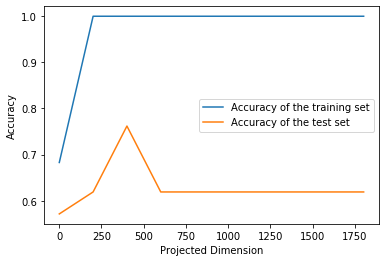

In [10]:
### TODO ### 
## Choose a range of different projected dimensions to test
## Suggested range of projected dimensions:
upperbnd = d
project_dimensions = range(1,upperbnd,int((upperbnd )/10))
#############
test_accuracy = []
training_accuracy = []
s = 20
for r in project_dimensions: 
    ### TODO ###        
    # 3)    project the data matrix $X \rightarrow XW$ using Gaussian and fit, 
    #      transform and score using Logstic Regression
    
    W = np.random.normal(size=(d,r))
    
    # Fit Logistic Regression
    log_reg = LogisticRegression(C = C0)
    log_reg.fit(X_train * W, y_train)

    # Recover Coefficients
    log_reg.coef_ = log_reg.coef_.dot(W.T)

    trainscore=log_reg.score(X_train,y_train)
    training_accuracy.append(trainscore)
    testscore=log_reg.score(X_test,y_test)
    test_accuracy.append(testscore)
    #############
    print ("project dimension %4d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))
# coef_recover= log_regt.coef_.dot(X_train.transpose())

plt.plot(project_dimensions,training_accuracy, label='Accuracy of the training set')
plt.plot(project_dimensions,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Projected Dimension')
plt.legend()
index_max = np.argmax(test_accuracy)
print("Best score was for r =%5d with: (train, test) =  (%.4f, %.4f)"% (project_dimensions[index_max], training_accuracy[index_max],test_accuracy[index_max]))

#ANSWER TO QUESTION 3 
The accuracies obtained here are quite similiar to the ones we obtained in the previous exercise. The partially improved accuracy can be explained by taking into account that by reducing the dimensions the problem of overfitting is reduced. Also from a certain value on, the accuracy on the training set becomes constant while it starts decreasing on the test set. So in conclusion, it's better to choose small values for the projected dimession r.

## Exercise 2:

In class we used 
$$ X \rightarrow W^\top X $$
But here it is instead
$$ X \rightarrow X W $$



Now we will train a model using a large text based data set. For this you need to code the following random transform $W \in \mathbb{R}^{d \times r}$ that takes a sparsity parameter $s$ as an input and outputs a matrix

$$ W_{ij}  = \sqrt{\frac{s}{r}}
\begin{cases}
1 \quad & \mbox{with probability }\frac{1}{2s} \\
0 \quad & \mbox{with probability }1-\frac{1}{s} \\
-1 \quad & \mbox{with probability }\frac{1}{2s} 
\end{cases}$$

* Code a function Generate_Sparse_Transform$(s,r,d)$ that takes an input  
   * sparsity parameter  $s$
   * input dimension $d \in \mathbb{N}$
   * lower dimensional projected dimension $r \in \mathbb{N}$
and gives as outputs the matrix $W$ stored in an efficient sparse format such as the CSC formart (see scipy.sparse.csc_matrix)

* Code a function Apply_Sparse_Transform$(R,X)$ that takes an input
   * the random transform $W$ as generated by  Generate\_sparse\_transform$(s,r,d)$
   * a given data matrix $X \in \mathbb{R}^{n\times d}$
the output will be $XW$.


*Note* if you have not implemented this efficiently, you will probably run out of memory!  


We will test if random projections are able to preserve pairwise distances by applying K-Neighrest Neighbors to projected data.

1) [6pts] Code the above two functions (their stub is provided below)


2) [1pt] Load the data set X. Then fit, transform and score sklearn's KNeighborsClassifier on this data, where 
$X = $ {anthracyclineTaxaneChemotherapy, sector.scale}. Below you will find how to load this data.

3) [3pts] Repeat the previous step, but first randomly project that data using X -> XW. Repeat this test for different values of the sparsity parameter s and projected dimension parameter r. What can you conclude? 

*Hint* As a rule of thumb $s = \sqrt{r}$, $s= \log(r)$ or simply $s=20$ often works well.


In [0]:
import scipy
from sklearn.utils.extmath import safe_sparse_dot   ## <-- I recommend using this function
from sklearn.utils.random import sample_without_replacement  ## <-- I recommend using this function

def GenerateSparseTransform(s,r,d):
    ### TODO ### 
    ##  Implement this function. Make sure that W is a sparse matrix!
    #############
    val = np.sqrt(s/r)
    
    cnt = 0
    
    data = []
    rowindex = []
    colptr = []
       
    for i in range(r):
        for j in range(d):
            rand = np.random.random()
                        
            if rand < (1/(2 * s)):
                v = val
            elif rand < (1-(1/(2.0 * s))):
                v = 0
            else:
                v = -val
            
            if v != 0:
                data.append(v)
                rowindex.append(j)
                colptr.append(i)

    W=scipy.sparse.csc_matrix((data, (rowindex, colptr)), shape=(d, r))
    return W

def ApplySparseTransform(W,X_):
#     W   : Sparse randomly generated matrix of size d by r
#     X_  : Data matrix to be compressed, of size n by d
#    NOTE: The dimensions of W and X_ are such that the product X_*W is defined (which is different that what we used in class)
    ### TODO ### 
    ##  Implement this function. Make sure that W is a sparse matrix!
    #############
    
    #d = (X_.shape[0], W[0][1])    
    #Xtransformed = np.zeros(shape = d)

    #for i in range(d[0]):
    #    ptr = 0
    #    for j in range(d[1]):
    #        for p in range(ptr, ptr + W[3][j]):
    #            Xtransformed[i,j] += X_[i,W[2][ptr]] * W[1][ptr]
    
    # Since a library function was given in the beginning, let's use that one since it will be better in any case, then the own implementation
    
    Xtransformed = safe_sparse_dot(X_, W)
    return Xtransformed

## Load and test easier data set *anthracyclineTaxaneChemotherapy*

In [0]:
from sklearn.datasets import fetch_openml
chemo = fetch_openml(name='anthracyclineTaxaneChemotherapy')

In [0]:
X = chemo.data
y = chemo.target

### if fetch_openml fails  
**ALTERNATIVE HACK for loading the data**
  
* downloard the data from data set in arff format from: https://www.openml.org/d/1085
 
* place data in the same folder as this notebook and run the code in the next cell

In [15]:
## ALTERNATIVE HACK for loading anthracyclineTaxaneChemotherapy ## 
"""from scipy.io import arff
dataset = arff.loadarff('phpCLGrjq.arff')
import pandas as pd
Xdf = pd.DataFrame(dataset[0])
Xy = Xdf.as_matrix()
n_rows, n_cols = Xy.shape
X = Xy[:,:-1]
X = np.float_(X)
y = Xy[:,-1]
y = (np.int_(y))*2-3"""

"from scipy.io import arff\ndataset = arff.loadarff('phpCLGrjq.arff')\nimport pandas as pd\nXdf = pd.DataFrame(dataset[0])\nXy = Xdf.as_matrix()\nn_rows, n_cols = Xy.shape\nX = Xy[:,:-1]\nX = np.float_(X)\ny = Xy[:,-1]\ny = (np.int_(y))*2-3"

In [16]:
# split test and training. Only use 20% of data for testing because data set is small. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
n, d = X_train.shape
print('{n} training data points and {d} features'.format(n = n,d =d))

127 training data points and 61359 features


In [17]:
# 2) fit, transform and score the knn Classifier
n_neighbors =2 # <-- use this number of neighbours
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

knn.fit(X_train,y_train)
trainscore = knn.score(X_train, y_train)
training_accuracy.append(trainscore)
testscore = knn.score(X_test, y_test)
test_accuracy.append(knn.score(X_test, y_test))
print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (d, trainscore,testscore))

project dim 61359 gives: (train, test) =  (0.8425, 0.5625)


project dim    30 gives: (train, test) =  (0.8189, 0.6875)
project dim   154 gives: (train, test) =  (0.8504, 0.5938)
project dim   278 gives: (train, test) =  (0.8110, 0.5312)
project dim   402 gives: (train, test) =  (0.7953, 0.5625)
project dim   526 gives: (train, test) =  (0.8346, 0.5625)
project dim   650 gives: (train, test) =  (0.8661, 0.6250)
project dim   774 gives: (train, test) =  (0.8425, 0.5000)
project dim   898 gives: (train, test) =  (0.8346, 0.5625)
project dim  1022 gives: (train, test) =  (0.8110, 0.6250)
project dim  1146 gives: (train, test) =  (0.8110, 0.6562)
Best score was for r =   30 with: (train, test) =  (0.8189, 0.6875)


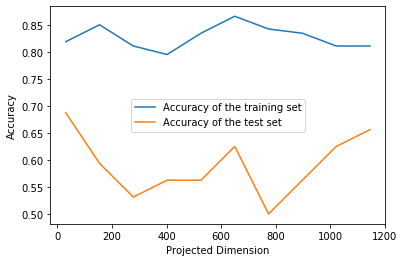

In [18]:
test_accuracy = []
training_accuracy = []
n_neighbors =2  #< -- I recommend 2 neighbors

## Suggested range of projected dimensions:
upperbnd = int(min(10*n,d/2))
minbnd = int(max(n/20,d/2000))
project_dimensions = range(minbnd,upperbnd,int((upperbnd -minbnd)/10))

knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
for r in project_dimensions:  
    W = GenerateSparseTransform(s =20, r= r,d = d) # function coded above
    Xt_train = ApplySparseTransform(W,X_train)  # function coded above
    Xt_test =  ApplySparseTransform(W,X_test)  # function coded above
    knn.fit(Xt_train,y_train)
    trainscore = knn.score(Xt_train, y_train)
    training_accuracy.append(trainscore)
    testscore = knn.score(Xt_test, y_test)
    test_accuracy.append(knn.score(Xt_test, y_test))
    print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))

list_proj_dims = list(project_dimensions)
plt.plot(list_proj_dims,training_accuracy, label='Accuracy of the training set')
plt.plot(list_proj_dims,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Projected Dimension')
plt.legend()
index_max = np.argmax(test_accuracy)
print("Best score was for r =%5d with: (train, test) =  (%.4f, %.4f)"% (list_proj_dims[index_max], training_accuracy[index_max],test_accuracy[index_max]))

## Load and test HARDER data set *sector.scale*  
**(only try this data set after successfully testing the anthracyclineTaxaneChemotherapy data set)**

In [19]:
# Download the data set from:
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/sector/sector.scale.bz2
# place data in the same folder as this python notebook
dataname = "sector.scale"  
X, y = get_data(dataname)
n, d = X.shape
print('{n} data points and {d} features'.format(n = n,d =d))

6412 data points and 55197 features


In [20]:
# split test and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
print('{n} trainig data points and {d} features'.format(n = n,d =d))

4296 trainig data points and 55197 features


In [0]:
### TODO ### 
## repeat the same experiments for this larger data set
## HINT: Only test project dimensions r <= int(min(2*n,d/2))
#############

project dim   214 gives: (train, test) =  (1.0000, 0.7623)
project dim  1051 gives: (train, test) =  (1.0000, 0.8629)
project dim  1888 gives: (train, test) =  (1.0000, 0.8767)
project dim  2725 gives: (train, test) =  (1.0000, 0.8762)
project dim  3562 gives: (train, test) =  (1.0000, 0.8795)
project dim  4399 gives: (train, test) =  (1.0000, 0.8781)
project dim  5236 gives: (train, test) =  (1.0000, 0.8823)
project dim  6073 gives: (train, test) =  (1.0000, 0.8781)
project dim  6910 gives: (train, test) =  (1.0000, 0.8809)
project dim  7747 gives: (train, test) =  (1.0000, 0.8828)
project dim  8584 gives: (train, test) =  (1.0000, 0.8790)
Best score was for r = 7747 with: (train, test) =  (1.0000, 0.8828)


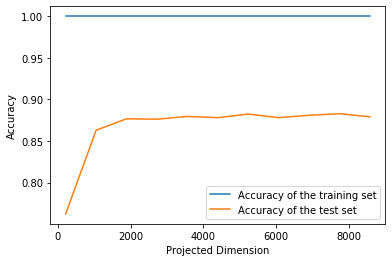

In [22]:
test_accuracy = []
training_accuracy = []
n_neighbors =1   ## <-- I recommend using this
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

upperbnd = int(min(2*n,d/2))
minbnd = int(max(n/20,d/2000))
project_dimensions = range(minbnd,upperbnd,int((upperbnd -minbnd)/10))
    
for r in project_dimensions:  
    ### TODO ###   
    # 3)    project the data matrix $X \rightarrow XW$ using Gaussian and fit, 
    #      transform and score using knn  
    W = GenerateSparseTransform(s=20, r= r,d = d) # function coded above
    Xt_train = ApplySparseTransform(W,X_train)  # function coded above
    Xt_test =  ApplySparseTransform(W,X_test)  # function coded above
    knn.fit(Xt_train,y_train)
    trainscore = knn.score(Xt_train, y_train)
    training_accuracy.append(trainscore)
    testscore = knn.score(Xt_test, y_test)
    test_accuracy.append(knn.score(Xt_test, y_test))
    #############
    print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))

list_proj_dims = list(project_dimensions)
plt.plot(list_proj_dims,training_accuracy, label='Accuracy of the training set')
plt.plot(list_proj_dims,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Projected Dimension')
plt.legend()
index_max = np.argmax(test_accuracy)
print("Best score was for r =%5d with: (train, test) =  (%.4f, %.4f)"% (list_proj_dims[index_max], training_accuracy[index_max],test_accuracy[index_max]))

## Bonus question

Using the Jonhson-Lindenstrauss Lemma, we can have an estimate for the projected dimension using

$$r = \frac{1}{\epsilon^2}\log(n/\delta) $$

1) Write a function for calculating this given suggested project dimension r. 
2) Test for each of the above data sets with \epsilon = 0.05 = \delta and compare to your results. 

In [0]:
delta = .05
eps = 0.05
def ComputeJL(n,delta,eps):
    
    return int((1 / epsilon**2)*np.log(n/delta))


#TEST OF PRJECTED DIMESSION r WITH THE CHEMO DATA SET

NB: the accuracy using a value of r obtained from the Jonhson-Lindenstrauss Lemma(0.65) is quite similar to the best accuracy obtained testing with different values of r.


In [31]:
X = chemo.data
y = chemo.target
# split test and training. Only use 20% of data for testing because data set is small. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
n, d = X_train.shape
print('{n} training data points and {d} features'.format(n = n,d =d))
r = ComputeJL(n = n,delta=delta,eps=eps)
#train on the transformed data
#W has shape d*r
W = GenerateSparseTransform(s =20, r= r,d = d) # function coded above
Xt_train = ApplySparseTransform(W,X_train)  # function coded above
Xt_test =  ApplySparseTransform(W,X_test)  # function coded above
knn.fit(Xt_train,y_train)
trainscore = knn.score(Xt_train, y_train)
training_accuracy.append(trainscore)
testscore = knn.score(Xt_test, y_test)
test_accuracy.append(knn.score(Xt_test, y_test))
print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))

127 training data points and 61359 features
project dim  3135 gives: (train, test) =  (1.0000, 0.6250)


#TEST OF THE PROJECTED DIMESSION WITH THE HARDER DATA SET: sector.scale

We shall also notice here how the accuracy obtained using the Jonhson-Lindenstrauss Lemma is quite similar to the best accuracy obtained trying with different values of r. 

In [32]:
X, y = get_data(dataname)
n, d = X.shape

# split test and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
print('{n} trainig data points and {d} features'.format(n = n,d =d))

r = ComputeJL(n = n,delta=delta,eps=eps)
#train on the transformed data
#W has shape d*r
W = GenerateSparseTransform(s =20, r= r,d = d) # function coded above
Xt_train = ApplySparseTransform(W,X_train)  # function coded above
Xt_test =  ApplySparseTransform(W,X_test)  # function coded above
knn.fit(Xt_train,y_train)
trainscore = knn.score(Xt_train, y_train)
training_accuracy.append(trainscore)
testscore = knn.score(Xt_test, y_test)
test_accuracy.append(knn.score(Xt_test, y_test))
print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))

4296 trainig data points and 55197 features
project dim  4544 gives: (train, test) =  (1.0000, 0.8781)
